# Use of priors in determining the importance of variables

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pymc_bart as pmb

In [2]:
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

In [3]:
# General parameters and variables names
samples = 100
ns = [100, 500, 1000]
labels = ["X_0", "X_1", "X_2", "X_3", "X_4"]
methods = ["VI", "backward"]
importance = ["same", "different"]

***Definition***
```
split_prior : Optional[List[float]], default None.
    List of positive numbers, one per column in input data.
    Defaults to None, all covariates have the same prior probability to be selected.
```

## No Prior  
### Variables with same importance  

In [4]:
idatas_no_prior_same = {}
trees_no_prior_same = {}
funcs_no_prior_same = {}

for n in ns:
    X = np.random.uniform(low=0, high=1.0, size=(n, 5))
    f_x = 2 * X[:, 0] + 2 * X[:, 1]
    Y = np.random.normal(f_x, 1)
    funcs_no_prior_same[str(n)] = (X, f_x, Y)

    with pm.Model() as model:
        μ = pmb.BART("μ", X, Y, m=50)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(chains=4, compute_convergence_checks=False)

    idatas_no_prior_same[str(n)] = idata
    trees_no_prior_same[str(n)] = μ

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 83 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 90 seconds.


In [5]:
idatas_no_prior = [idatas_no_prior_same]
trees_no_prior = [trees_no_prior_same]
funcs_no_prior = [funcs_no_prior_same]

### Variable with different importance  

In [6]:
idatas_no_prior_diff = {}
trees_no_prior_diff = {}
funcs_no_prior_diff = {}

for n in ns:
    X = np.random.uniform(low=0, high=1.0, size=(n, 5))
    f_x = 2 * X[:, 0] + 10 * X[:, 1]
    Y = np.random.normal(f_x, 1)
    funcs_no_prior_diff[str(n)] = (X, f_x, Y)

    with pm.Model() as model:
        μ = pmb.BART("μ", X, Y, m=50)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(chains=4, compute_convergence_checks=False)

    idatas_no_prior_diff[str(n)] = idata
    trees_no_prior_diff[str(n)] = μ

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 81 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 88 seconds.


In [7]:
idatas_no_prior.append(idatas_no_prior_diff)
trees_no_prior.append(trees_no_prior_diff)
funcs_no_prior.append(funcs_no_prior_diff)

/tmp/ipykernel_23311/2003694832.py:29: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=2)


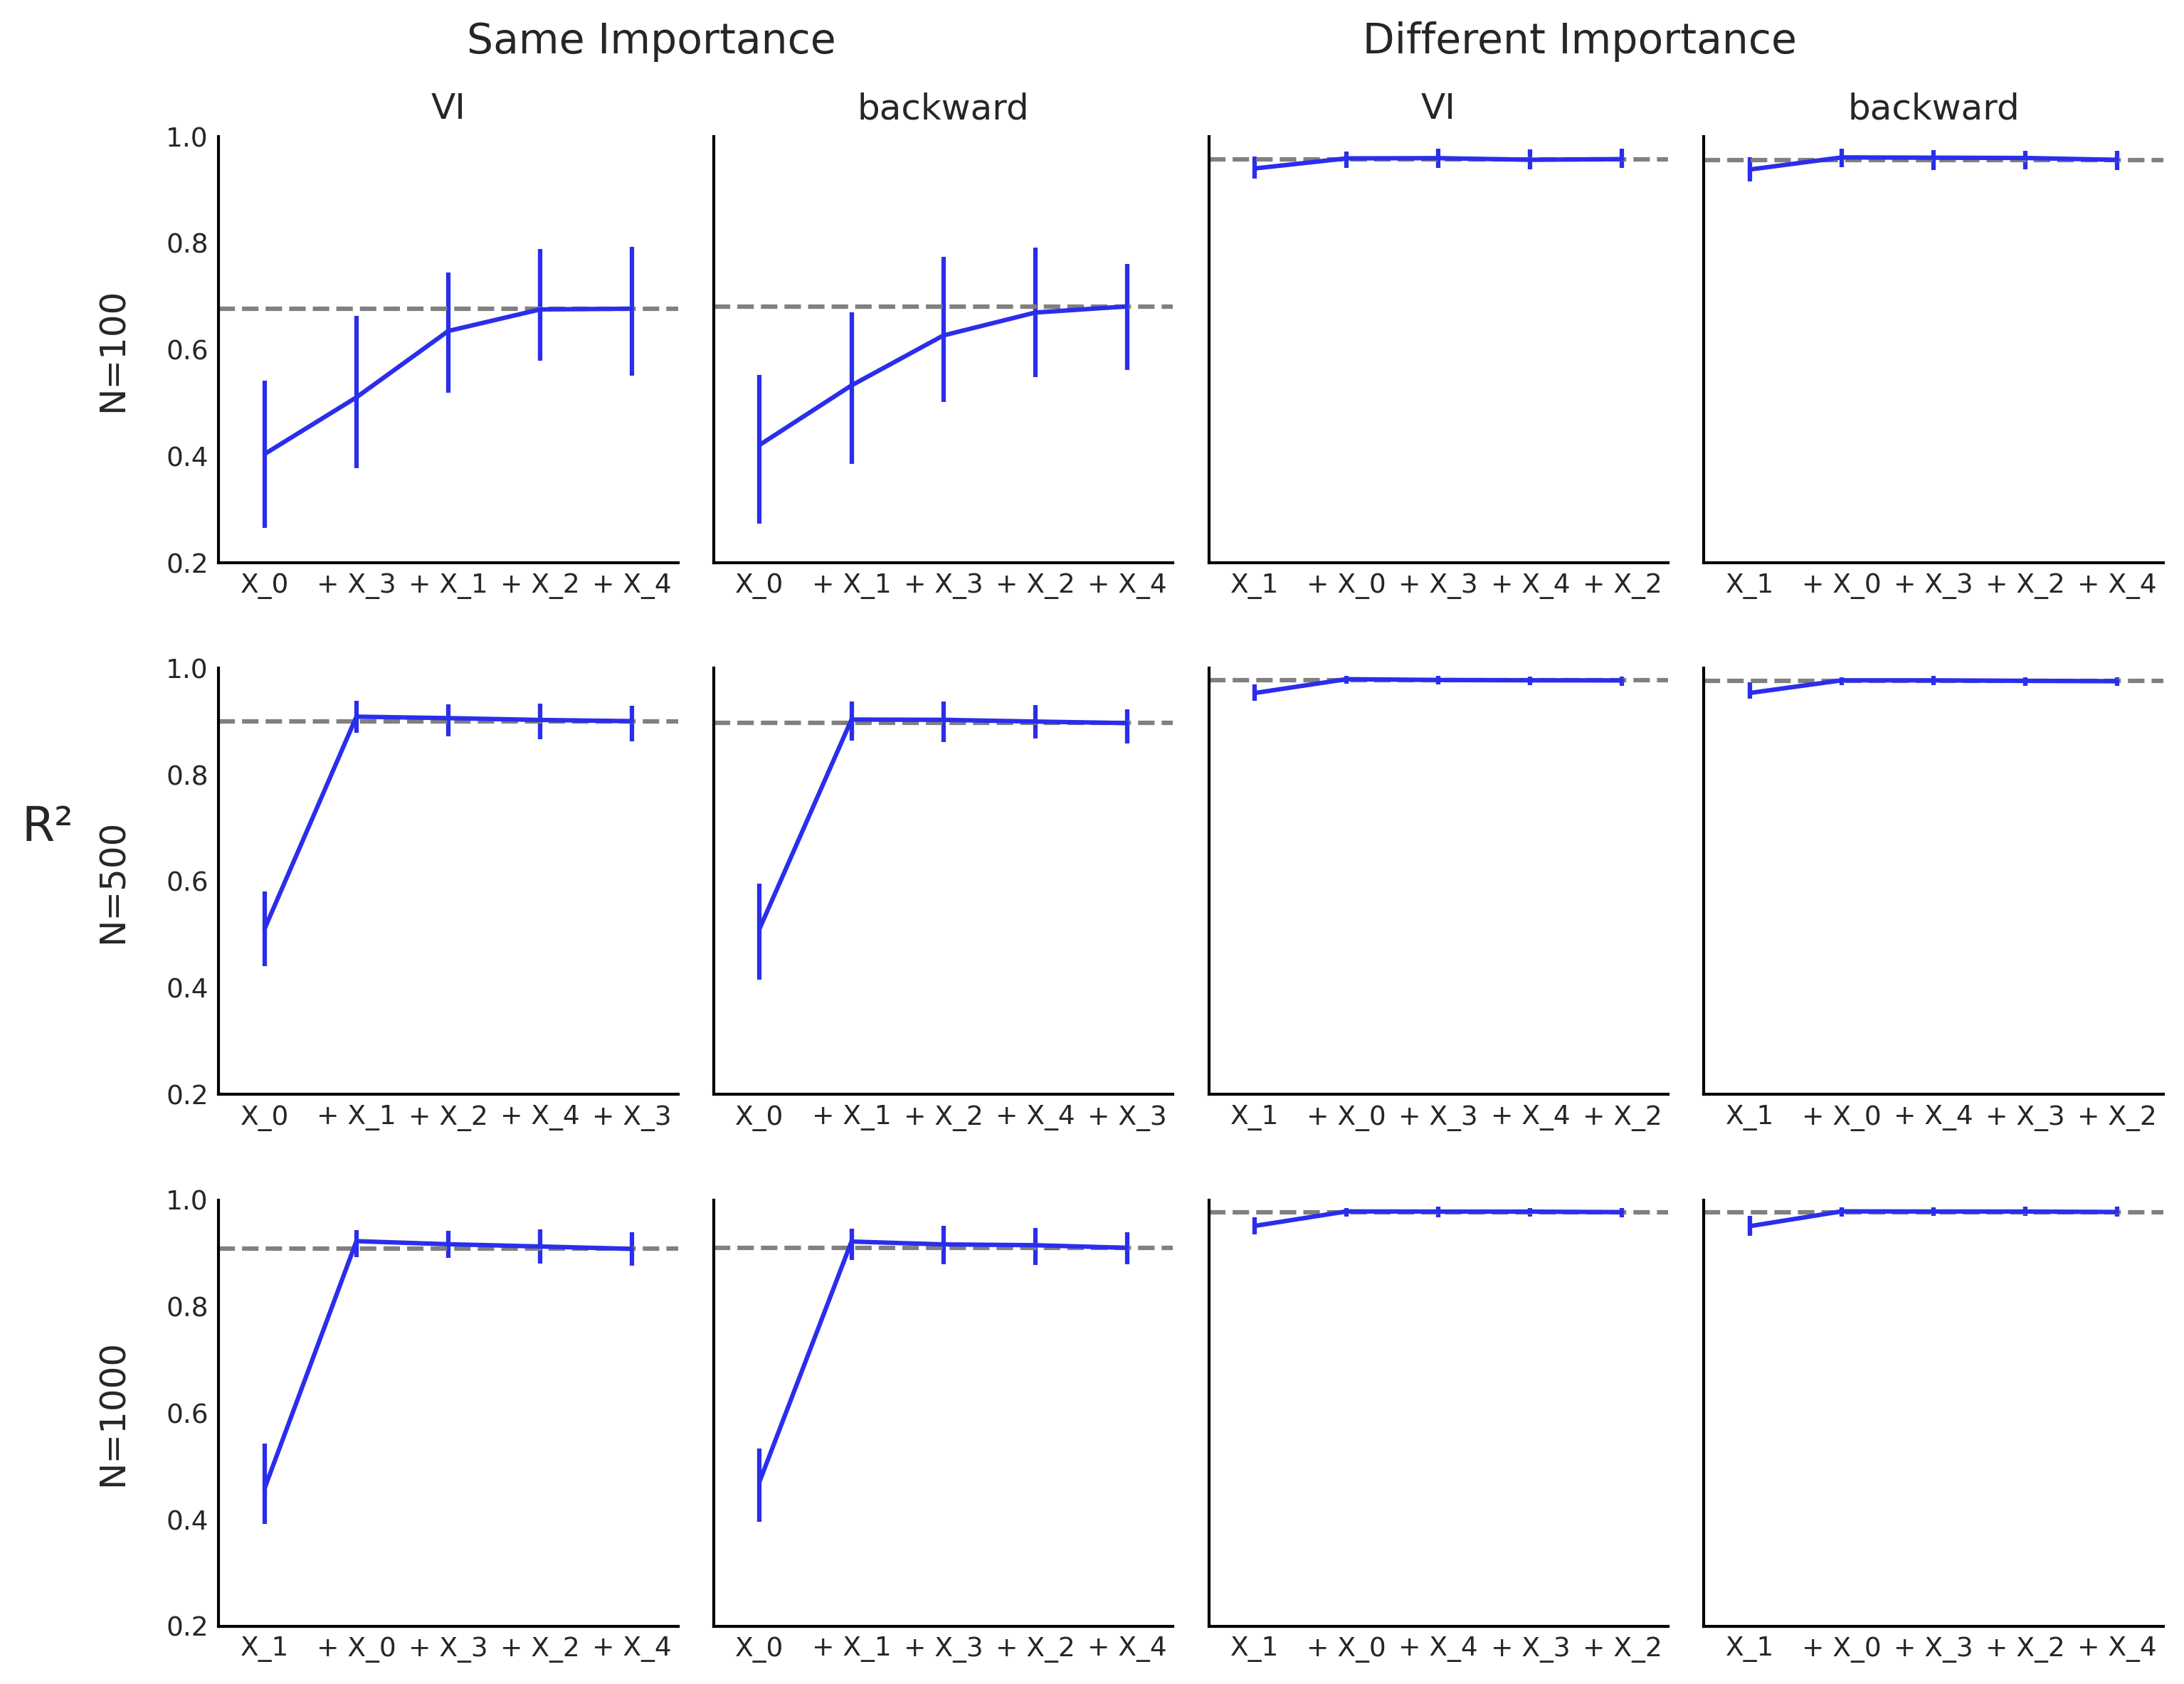

In [8]:
fig, axes = plt.subplots(3, 4, sharey=True, figsize=(10, 8))

axs = axes.ravel()

i = 0
for n in ns:
    for j, imp in enumerate(importance):
        idata = idatas_no_prior[j][str(n)]
        μ = trees_no_prior[j][str(n)]
        X = funcs_no_prior[j][str(n)][0]
        for method in methods:
            pmb.utils.plot_variable_importance(
                idata, μ, X, labels, method=method, samples=samples, ax=axs[i]
            )
            # Aesthetics
            axs[i].set_ylabel("")
            axs[i].set_ylim(0.2, 1)
            axs[i].tick_params(axis="both", which="major", labelsize=9)
            if i < 4:  # titles first line of subplots
                axs[i].set_title(method, fontsize=12)
            i += 1

subtit = "Same Importance\t\t\t\t\tDifferent Importance".replace("\t", "        ")
fig.suptitle(f"{subtit}", fontsize=14)

fig.text(-0.02, 0.5, r"R²", fontsize=16)

for k, l in enumerate([0, 4, 8]):
    axs[l].set_ylabel(f"N={ns[k]}", rotation=90, fontsize=12)

fig.tight_layout(h_pad=2)
plt.savefig("variables_no_prior.png");

## Normalized Prior  

In [9]:
vi_prior = [0.5, 0.2, 0.1, 0.1, 0.1]

### Variables with same importance  

In [10]:
idatas_prior_norm_same = {}
trees_prior_norm_same = {}
funcs_prior_norm_same = {}

for n in ns:
    X = np.random.uniform(low=0, high=1.0, size=(n, 5))
    f_x = 2 * X[:, 0] + 2 * X[:, 1]
    Y = np.random.normal(f_x, 1)
    funcs_prior_norm_same[str(n)] = (X, f_x, Y)

    with pm.Model() as model:
        μ = pmb.BART("μ", X, Y, m=50, split_prior=vi_prior)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(chains=4, compute_convergence_checks=False)

    idatas_prior_norm_same[str(n)] = idata
    trees_prior_norm_same[str(n)] = μ

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 83 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 92 seconds.


In [11]:
idatas_prior_norm = [idatas_prior_norm_same]
trees_prior_norm = [trees_prior_norm_same]
funcs_prior_norm = [funcs_prior_norm_same]

### Variable with different importance  

In [12]:
idatas_prior_norm_diff = {}
trees_prior_norm_diff = {}
funcs_prior_norm_diff = {}

for n in ns:
    X = np.random.uniform(low=0, high=1.0, size=(n, 5))
    f_x = 2 * X[:, 0] + 10 * X[:, 1]
    Y = np.random.normal(f_x, 1)
    funcs_prior_norm_diff[str(n)] = (X, f_x, Y)

    with pm.Model() as model:
        μ = pmb.BART("μ", X, Y, m=50, split_prior=vi_prior)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(chains=4, compute_convergence_checks=False)

    idatas_prior_norm_diff[str(n)] = idata
    trees_prior_norm_diff[str(n)] = μ

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 74 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 82 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 89 seconds.


In [13]:
idatas_prior_norm.append(idatas_prior_norm_diff)
trees_prior_norm.append(trees_prior_norm_diff)
funcs_prior_norm.append(funcs_prior_norm_diff)

/tmp/ipykernel_23311/2209842201.py:29: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=2)


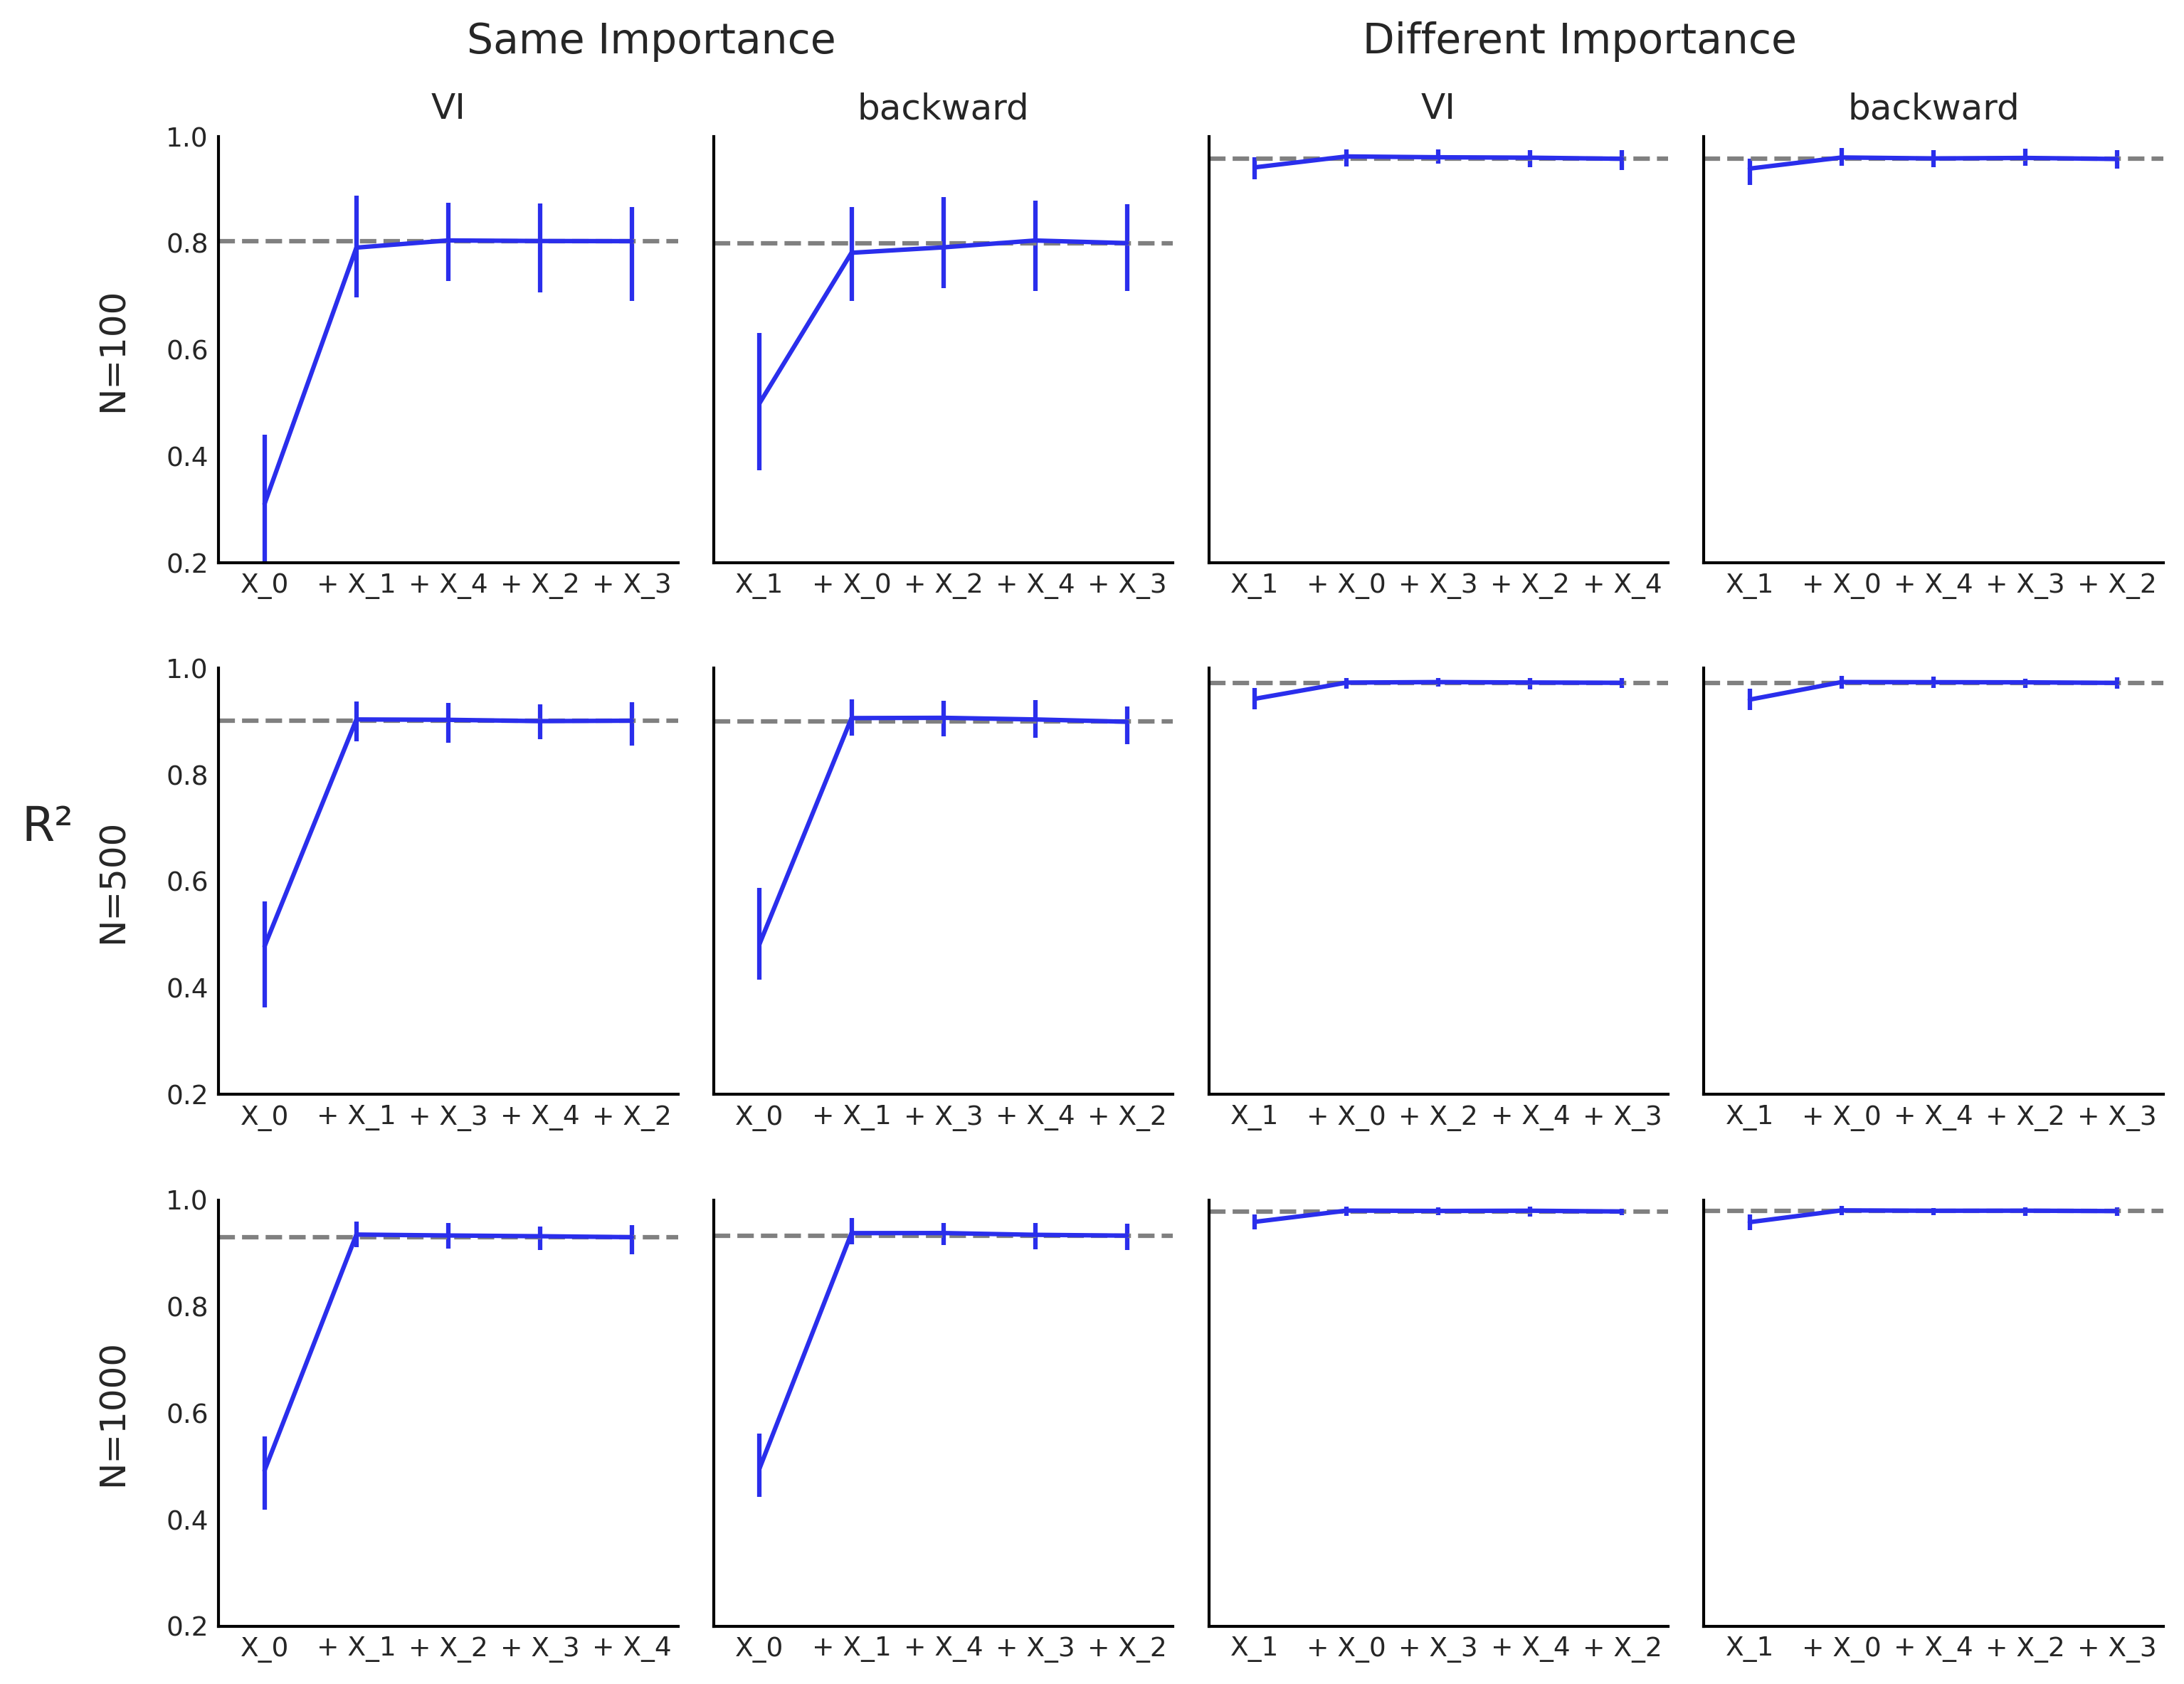

In [14]:
fig, axes = plt.subplots(3, 4, sharey=True, figsize=(10, 8))

axs = axes.ravel()

i = 0
for n in ns:
    for j, imp in enumerate(importance):
        idata = idatas_prior_norm[j][str(n)]
        μ = trees_prior_norm[j][str(n)]
        X = funcs_prior_norm[j][str(n)][0]
        for method in methods:
            pmb.utils.plot_variable_importance(
                idata, μ, X, labels, method=method, samples=samples, ax=axs[i]
            )
            # Aesthetics
            axs[i].set_ylabel("")
            axs[i].set_ylim(0.2, 1)
            axs[i].tick_params(axis="both", which="major", labelsize=9)
            if i < 4:  # titles first line of subplots
                axs[i].set_title(method, fontsize=12)
            i += 1

subtit = "Same Importance\t\t\t\t\tDifferent Importance".replace("\t", "        ")
fig.suptitle(f"{subtit}", fontsize=14)

fig.text(-0.02, 0.5, r"R²", fontsize=16)

for k, l in enumerate([0, 4, 8]):
    axs[l].set_ylabel(f"N={ns[k]}", rotation=90, fontsize=12)

fig.tight_layout(h_pad=2)
plt.savefig("variables_prior_norm.png");

## Not normalized Prior  

In [15]:
vi_prior_not_normalized = [50, 20, 10, 10, 10]

### Variable with same importance  

In [16]:
idatas_prior_not_norm_same = {}
trees_prior_not_norm_same = {}
funcs_prior_not_norm_same = {}

for n in ns:
    X = np.random.uniform(low=0, high=1.0, size=(n, 5))
    f_x = 2 * X[:, 0] + 2 * X[:, 1]
    Y = np.random.normal(f_x, 1)
    funcs_prior_not_norm_same[str(n)] = (X, f_x, Y)

    with pm.Model() as model:
        μ = pmb.BART("μ", X, Y, m=50, split_prior=vi_prior_not_normalized)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(chains=4, compute_convergence_checks=False)

    idatas_prior_not_norm_same[str(n)] = idata
    trees_prior_not_norm_same[str(n)] = μ

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 78 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 84 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 91 seconds.


In [17]:
idatas_prior_not_norm = [idatas_prior_not_norm_same]
trees_prior_not_norm = [trees_prior_not_norm_same]
funcs_prior_not_norm = [funcs_prior_not_norm_same]

### Variable with different importance  

In [18]:
idatas_prior_not_norm_diff = {}
trees_prior_not_norm_diff = {}
funcs_prior_not_norm_diff = {}

for n in ns:
    X = np.random.uniform(low=0, high=1.0, size=(n, 5))
    f_x = 2 * X[:, 0] + 10 * X[:, 1]
    Y = np.random.normal(f_x, 1)
    funcs_prior_not_norm_diff[str(n)] = (X, f_x, Y)

    with pm.Model() as model:
        μ = pmb.BART("μ", X, Y, m=50, split_prior=vi_prior_not_normalized)
        σ = pm.HalfNormal("σ", 1)
        y = pm.Normal("y", μ, σ, observed=Y)
        idata = pm.sample(chains=4, compute_convergence_checks=False)

    idatas_prior_not_norm_diff[str(n)] = idata
    trees_prior_not_norm_diff[str(n)] = μ

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 75 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 82 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>PGBART: [μ]
>NUTS: [σ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 88 seconds.


In [19]:
idatas_prior_not_norm.append(idatas_prior_not_norm_diff)
trees_prior_not_norm.append(trees_prior_not_norm_diff)
funcs_prior_not_norm.append(funcs_prior_not_norm_diff)

/tmp/ipykernel_23311/3022530592.py:29: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=2)


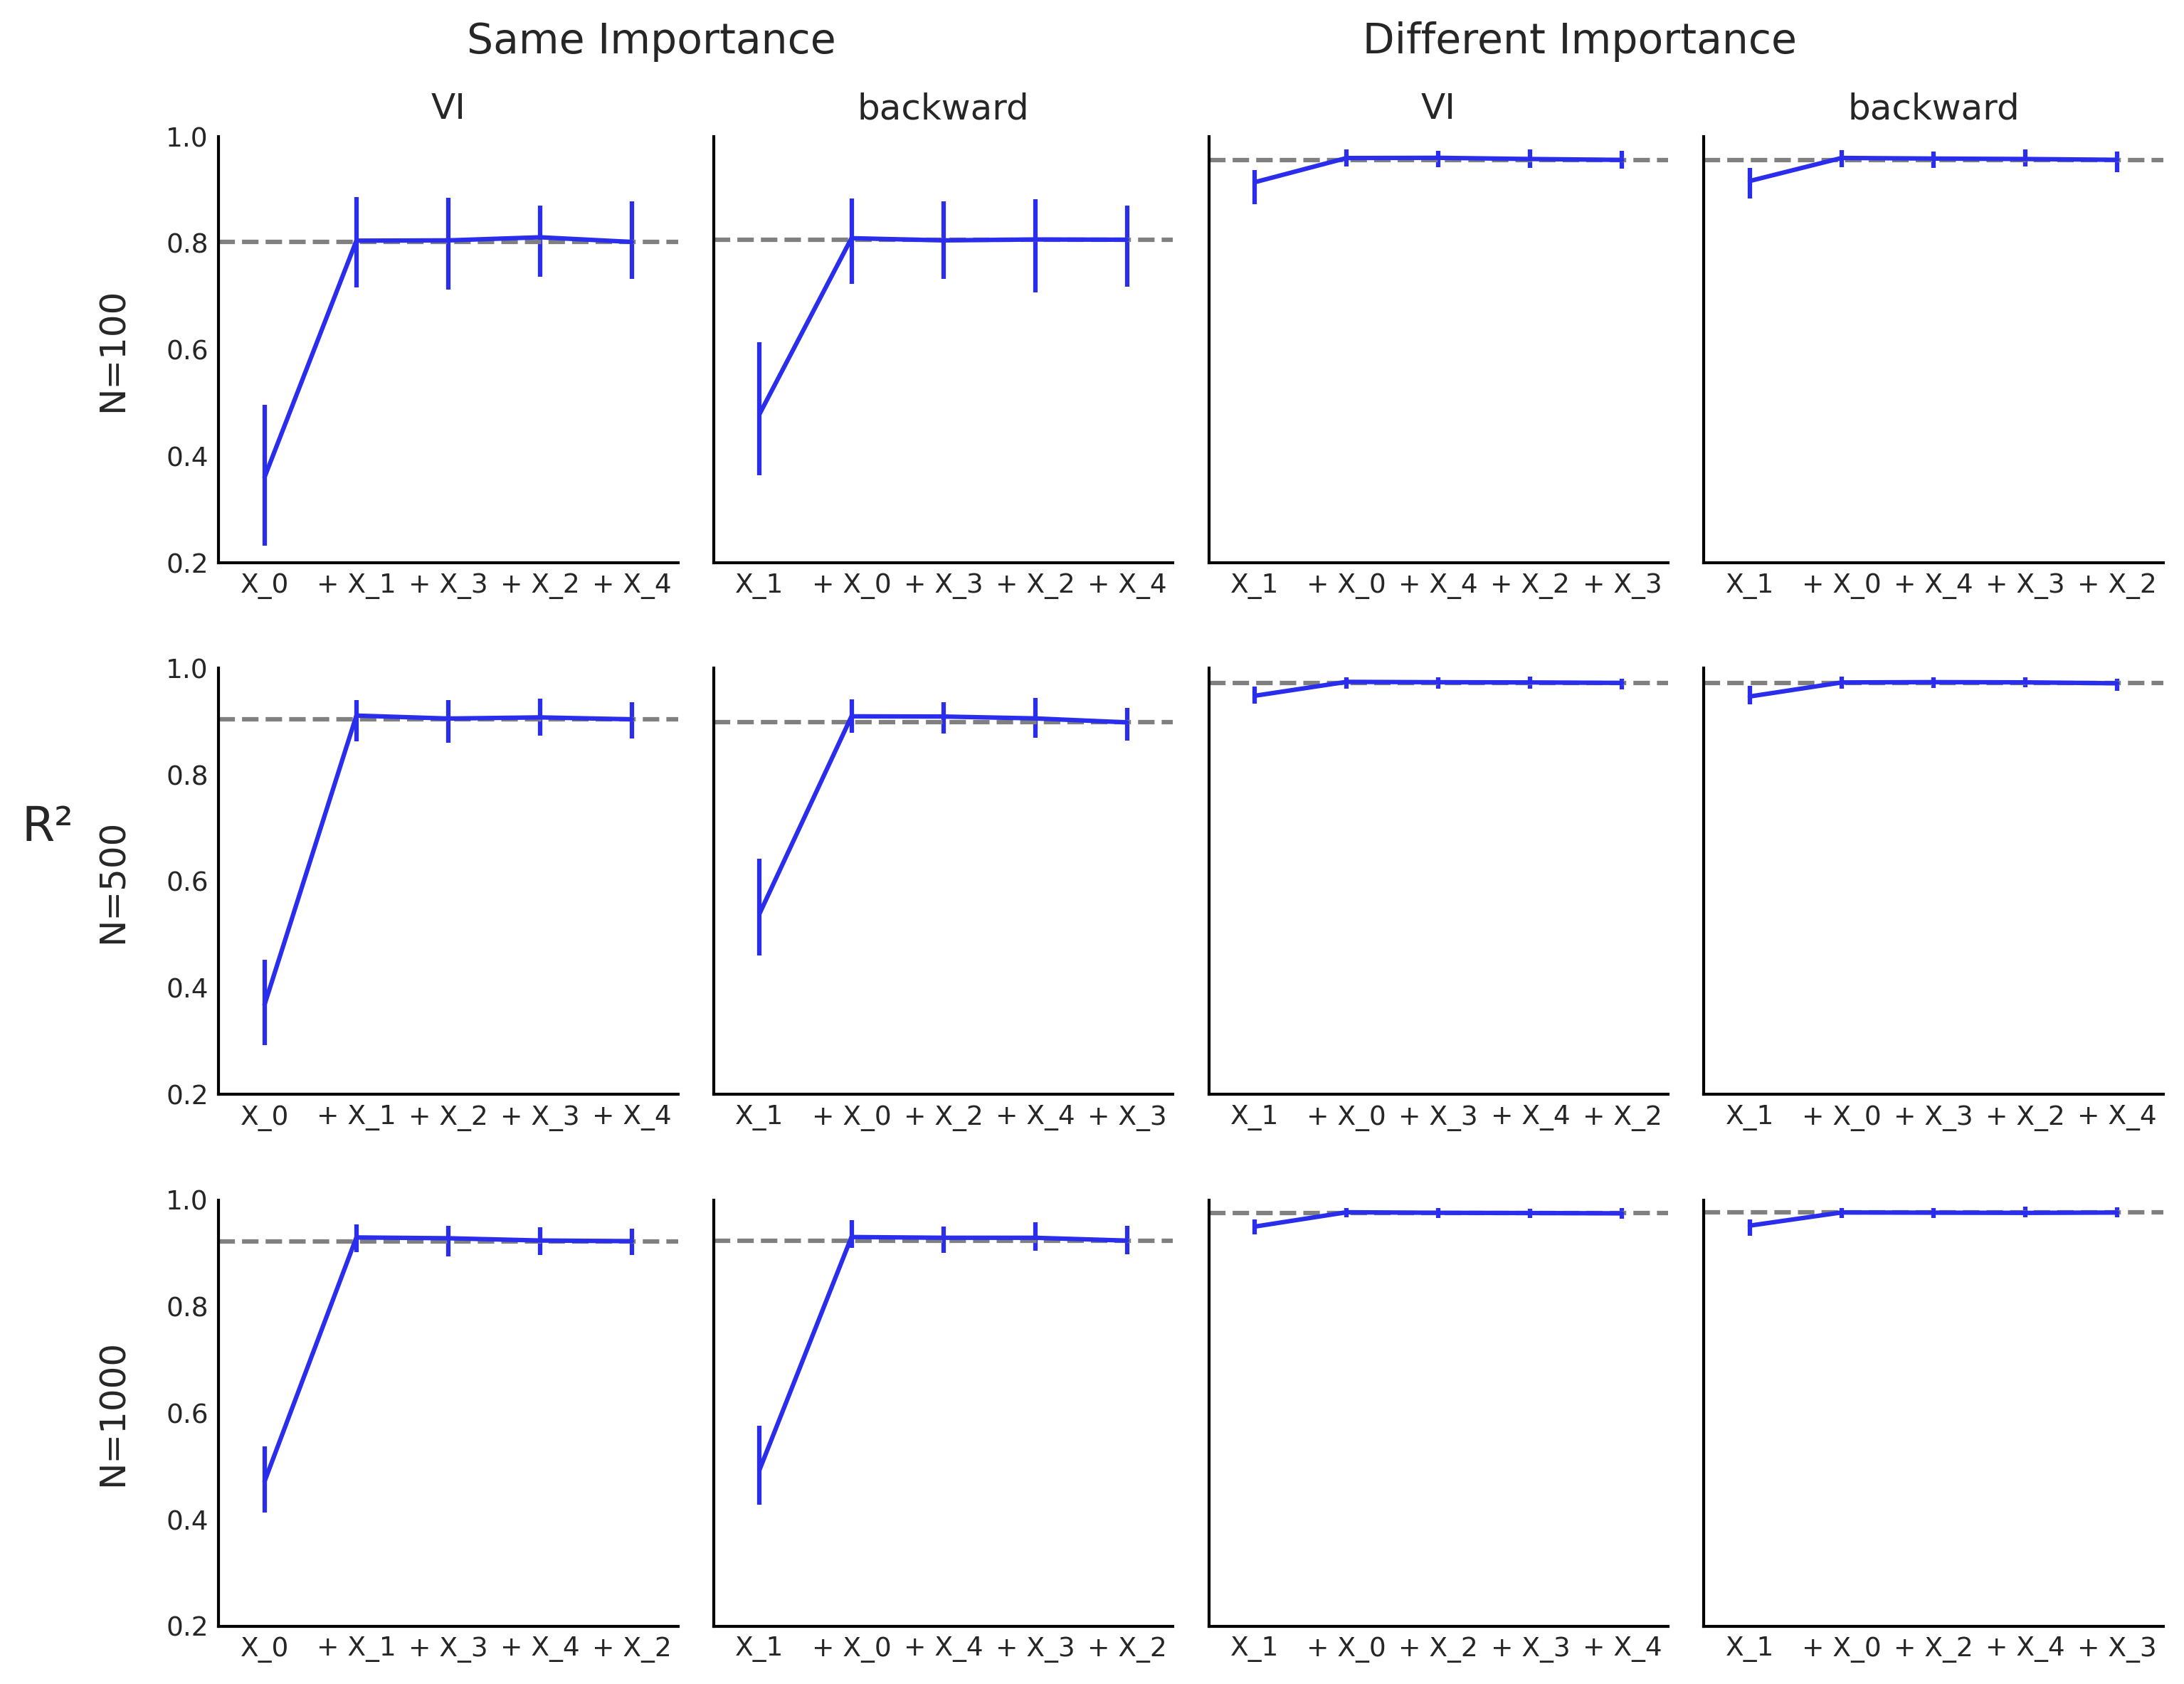

In [20]:
fig, axes = plt.subplots(3, 4, sharey=True, figsize=(10, 8))

axs = axes.ravel()

i = 0
for n in ns:
    for j, imp in enumerate(importance):
        idata = idatas_prior_not_norm[j][str(n)]
        μ = trees_prior_not_norm[j][str(n)]
        X = funcs_prior_not_norm[j][str(n)][0]
        for method in methods:
            pmb.utils.plot_variable_importance(
                idata, μ, X, labels, method=method, samples=samples, ax=axs[i]
            )
            # Aesthetics
            axs[i].set_ylabel("")
            axs[i].set_ylim(0.2, 1)
            axs[i].tick_params(axis="both", which="major", labelsize=9)
            if i < 4:  # titles first line of subplots
                axs[i].set_title(method, fontsize=12)
            i += 1

subtit = "Same Importance\t\t\t\t\tDifferent Importance".replace("\t", "        ")
fig.suptitle(f"{subtit}", fontsize=14)

fig.text(-0.02, 0.5, r"R²", fontsize=16)

for k, l in enumerate([0, 4, 8]):
    axs[l].set_ylabel(f"N={ns[k]}", rotation=90, fontsize=12)

fig.tight_layout(h_pad=2)
plt.savefig("variables_prior_not_norm.png");